<a href="https://colab.research.google.com/github/luisangel22091102/TAREAS-DE-METODOS-DE-SIMULACION/blob/main/TAREA_4%2C1_Y_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MENDEZ VASQUEZ LUIS ANGEL_202086765**


# **Método de Runge-Kutta**
La técnica general más popular y estable para resolver EDO es un conjunto de métodos
conocidos como métodos “Runge-Kutta”. En análisis numérico, los métodos de Runge-Kutta
son un conjunto de métodos genéricos iterativos, explícitos e implícitos, de resolución numérica
de ecuaciones diferenciales. Este conjunto de métodos fue inicialmente desarrollado alrededor
del año 1900 por los matemáticos alemanes C. Runge y M. W. Kutta. os métodos de Runge-
Kutta (RK) son un conjunto de métodos iterativos (implícitos y explícitos) para la aproximación
de soluciones de ecuaciones diferenciales ordinarias, concretamente, del problema de valor
inicial. Existen variantes del método de Runge-Kutta clásico, también llamado Runge-Kutta
explícito, tales como la versión implícita del procedimiento o las parejas de métodos Runge-
Kutta (o métodos Runge-Kutta-Fehlberg).
Este último consiste en ir aproximando la solución de la ecuación mediante dos algoritmos
Runge-Kutta de órdenes diferentes, para así mantener el error acotado y hacer una buena
elección de paso.

# **Scipy**
SciPy es una biblioteca libre y de código abierto para Python. Se compone de herramientas y
algoritmos matemáticos. Se creó a partir de la colección original de Travis Oliphant, que se
componía de módulos de extensión para Python y fue lanzada en 1999 bajo el nombre de
Multipack, llamada así por los paquetes netlib que reunían a ODEPACK, QUADPACK, y
MINPACK.

SciPy contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones
especiales, FFT, procesamiento de señales y de imagen, resolución de ODEs y otras tareas
para la ciencia e ingeniería.
SciPy se basa en el objeto de matriz NumPy y es parte del conjunto NumPy, que incluye
herramientas como Matplotlib, Pandas y SymPy, y un conjunto en expansión de bibliotecas de
computación científica. Este conjunto está dirigido al mismo tipo de usuarios que los de
aplicaciones como MATLAB, GNU Octave, y Scilab. A veces también se hace referencia a este
conjunto de herramientas y bibliotecas como SciPy.
Como era de esperar, Scipy tiene un módulo que resuelve ecuaciones diferenciales. Esta
función está disponible como scipy.integrate.odeint() y utiliza tamaños de pasos variables y
métodos de verificación de errores para devolver resultados muy precisos y eficientes.



#**ACTIVIDAD 1**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
t_max = 10 # Tiempo máximo
dt = 0.01 # Paso de tiempo

num_steps = int(t_max / dt)

# Condiciones iniciales
x = 1.0 # Posición inicial
v = 0.0 # Velocidad inicial

# Listas para almacenar los datos
positions = []

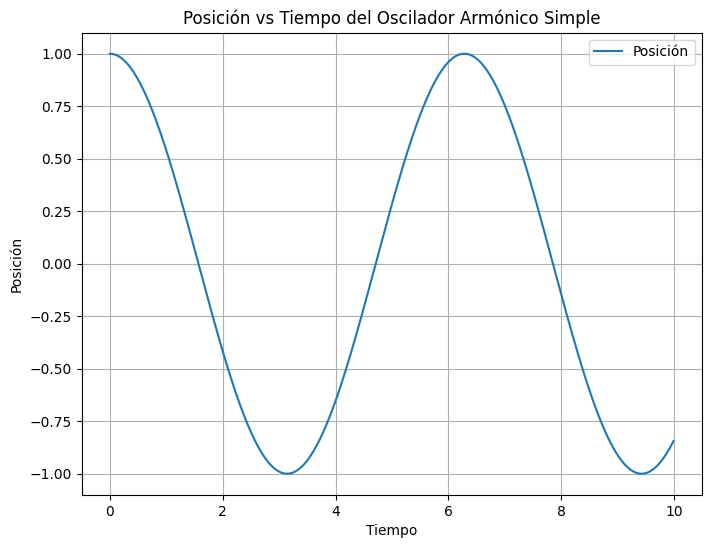

In [ ]:
times = []
# Método de integración (Runge-Kutta de cuarto orden) para el oscilador simple x'' = -x
for i in range(num_steps):
 positions.append(x)
 times.append(i * dt)
 k1x = dt * v
 k1v = dt * (-x)
 k2x = dt * (v + 0.5 * k1v)
 k2v = dt * (-(x + 0.5 * k1x))
 k3x = dt * (v + 0.5 * k2v)
 k3v = dt * (-(x + 0.5 * k2x))
 k4x = dt * (v + k3v)
 k4v = dt * (- (x + k3x))

 x += (k1x + 2 * k2x + 2 * k3x + k4x) / 6
 v += (k1v + 2 * k2v + 2 * k3v + k4v) / 6

# Graficar posición vs tiempo
plt.figure(figsize=(8, 6))
plt.plot(times, positions, label='Posición')
plt.title('Posición vs Tiempo del Oscilador Armónico Simple')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()
plt.grid(True)
plt.show()

#**ACTIVIDAD 2**

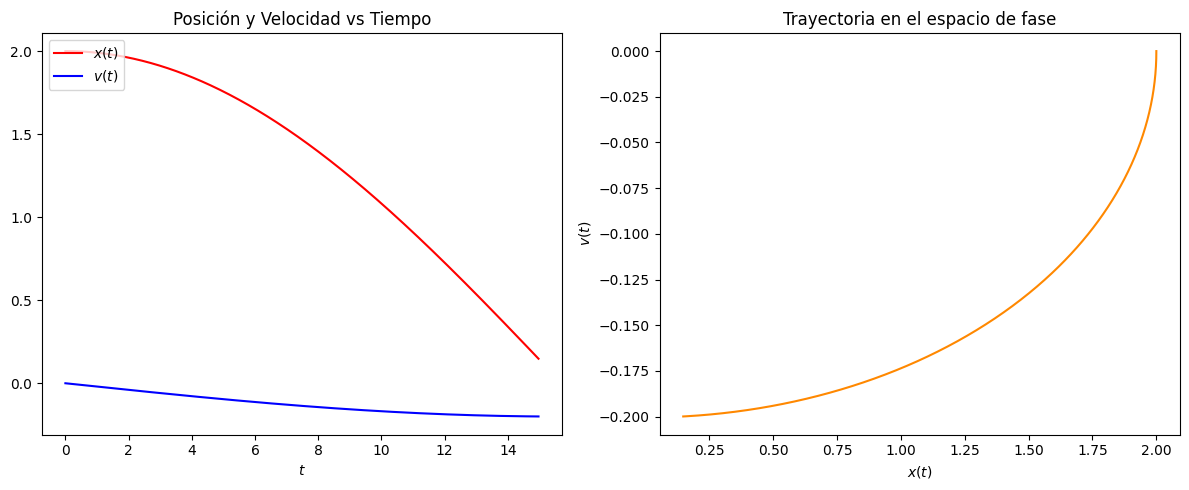

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ecuación diferencial del sistema armónico
def harmonic_eq(x, t, k):
    # x[0] es la posición, x[1] es la velocidad
    return x[1], -k * x[0]  # La derivada de la posición es la velocidad, y la de la velocidad es la aceleración

# Método de Euler para resolver la ecuación diferencial
def euler_2var(x, func, t, k, dt):
    # Obtener las derivadas usando la función
    y = func(x, t, k)
    # Método de Euler para las dos variables
    return x[0] + dt * y[0], x[1] + dt * y[1]

# Función para calcular y graficar las soluciones
def calc_plot2var(method, equation, k, dt, n_steps):
    # Array de tiempos
    t = np.arange(0, n_steps * dt, dt)

    # Inicializamos la solución en las primeras condiciones
    x = np.zeros((n_steps, 2))  # n_steps x 2 para posición y velocidad
    x[0, 0] = 2.0  # posición inicial
    x[0, 1] = 0.0  # velocidad inicial

    # Calculamos las soluciones con el método de Euler
    for i in range(n_steps - 1):
        x[i + 1] = method(x[i], equation, t[i], k, dt)

    # Graficar resultados
    fig = plt.figure(figsize=(12, 5))

    # Gráfico de la posición y la velocidad
    axes = fig.add_subplot(1, 2, 1)
    axes.plot(t, x[:, 0], 'r', label="$x(t)$")  # posición
    axes.plot(t, x[:, 1], 'b', label="$v(t)$")  # velocidad
    axes.set_xlabel("$t$")
    axes.set_title("Posición y Velocidad vs Tiempo")
    plt.legend(loc='upper left')

    # Gráfico de la trayectoria
    axes = fig.add_subplot(1, 2, 2)
    axes.plot(x[:, 0], x[:, 1], '#ff8800')
    axes.set_xlabel("$x(t)$")
    axes.set_ylabel("$v(t)$")
    axes.set_title("Trayectoria en el espacio de fase")

    plt.tight_layout()
    plt.show()

# Parámetros de simulación
if __name__ == "__main__":
    dt = 0.03      # paso de tiempo
    n_steps = 500  # número de pasos
    k = 0.01       # constante del sistema armónico
    calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps)


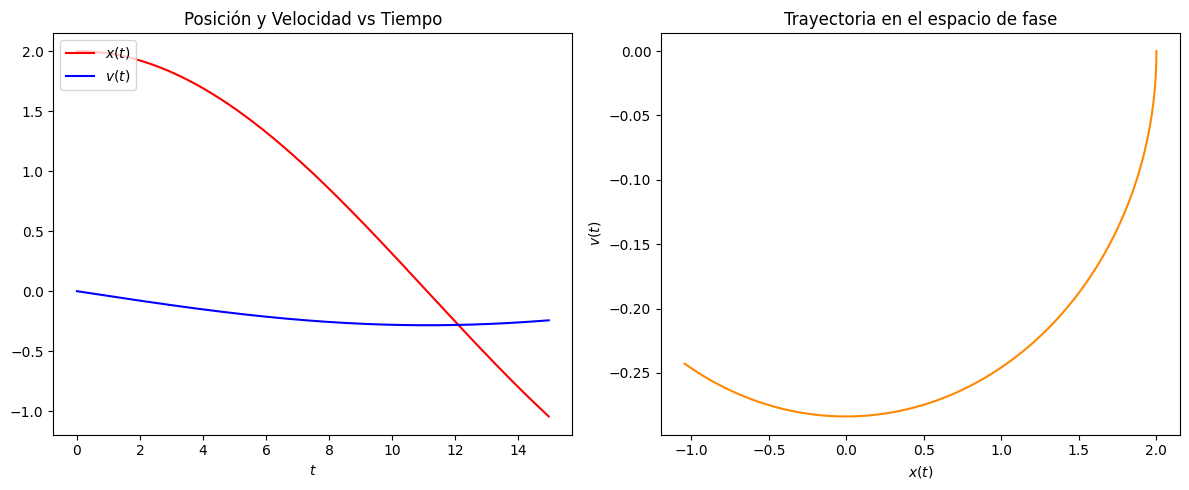

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ecuación diferencial del sistema armónico
def harmonic_eq(x, t, k):
    # x[0] es la posición, x[1] es la velocidad
    return x[1], -k * x[0]  # La derivada de la posición es la velocidad, y la de la velocidad es la aceleración

# Método de Euler para resolver la ecuación diferencial
def euler_2var(x, func, t, k, dt):
    # Obtener las derivadas usando la función
    y = func(x, t, k)
    # Método de Euler para las dos variables
    return x[0] + dt * y[0], x[1] + dt * y[1]

# Función para calcular y graficar las soluciones
def calc_plot2var(method, equation, k, dt, n_steps):
    # Array de tiempos
    t = np.arange(0, n_steps * dt, dt)

    # Inicializamos la solución en las primeras condiciones
    x = np.zeros((n_steps, 2))  # n_steps x 2 para posición y velocidad
    x[0, 0] = 2.0  # posición inicial
    x[0, 1] = 0.0  # velocidad inicial

    # Calculamos las soluciones con el método de Euler
    for i in range(n_steps - 1):
        x[i + 1] = method(x[i], equation, t[i], k, dt)

    # Graficar resultados
    fig = plt.figure(figsize=(12, 5))

    # Gráfico de la posición y la velocidad
    axes = fig.add_subplot(1, 2, 1)
    axes.plot(t, x[:, 0], 'r', label="$x(t)$")  # posición
    axes.plot(t, x[:, 1], 'b', label="$v(t)$")  # velocidad
    axes.set_xlabel("$t$")
    axes.set_title("Posición y Velocidad vs Tiempo")
    plt.legend(loc='upper left')

    # Gráfico de la trayectoria (Espacio fase: posición vs velocidad)
    axes = fig.add_subplot(1, 2, 2)
    axes.plot(x[:, 0], x[:, 1], '#ff8800')  # Posición vs Velocidad
    axes.set_xlabel("$x(t)$")
    axes.set_ylabel("$v(t)$")
    axes.set_title("Trayectoria en el espacio de fase")

    plt.tight_layout()
    plt.show()

# Parámetros de simulación
if __name__ == "__main__":
    dt = 0.03      # paso de tiempo
    n_steps = 500  # número de pasos
    k = 0.02       # constante del sistema armónico
    calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps)


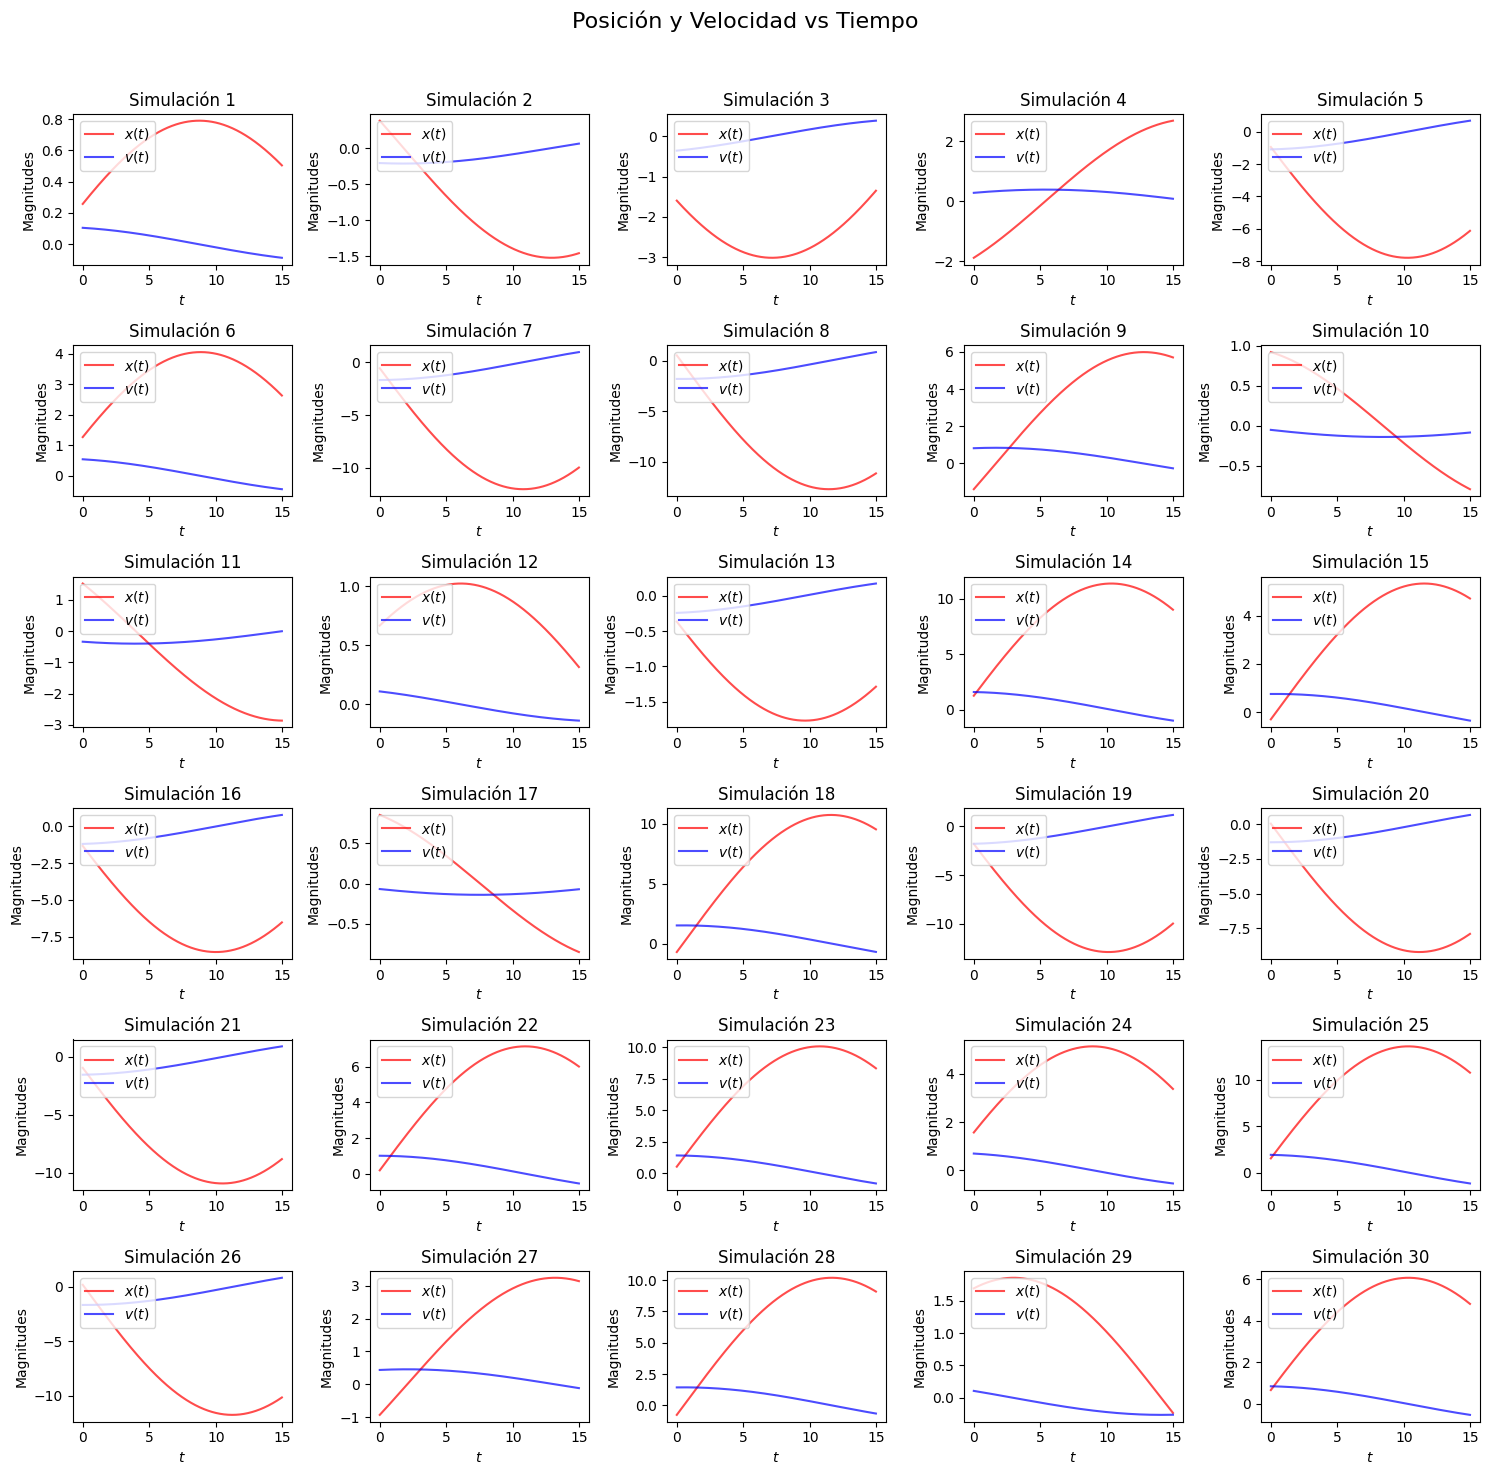

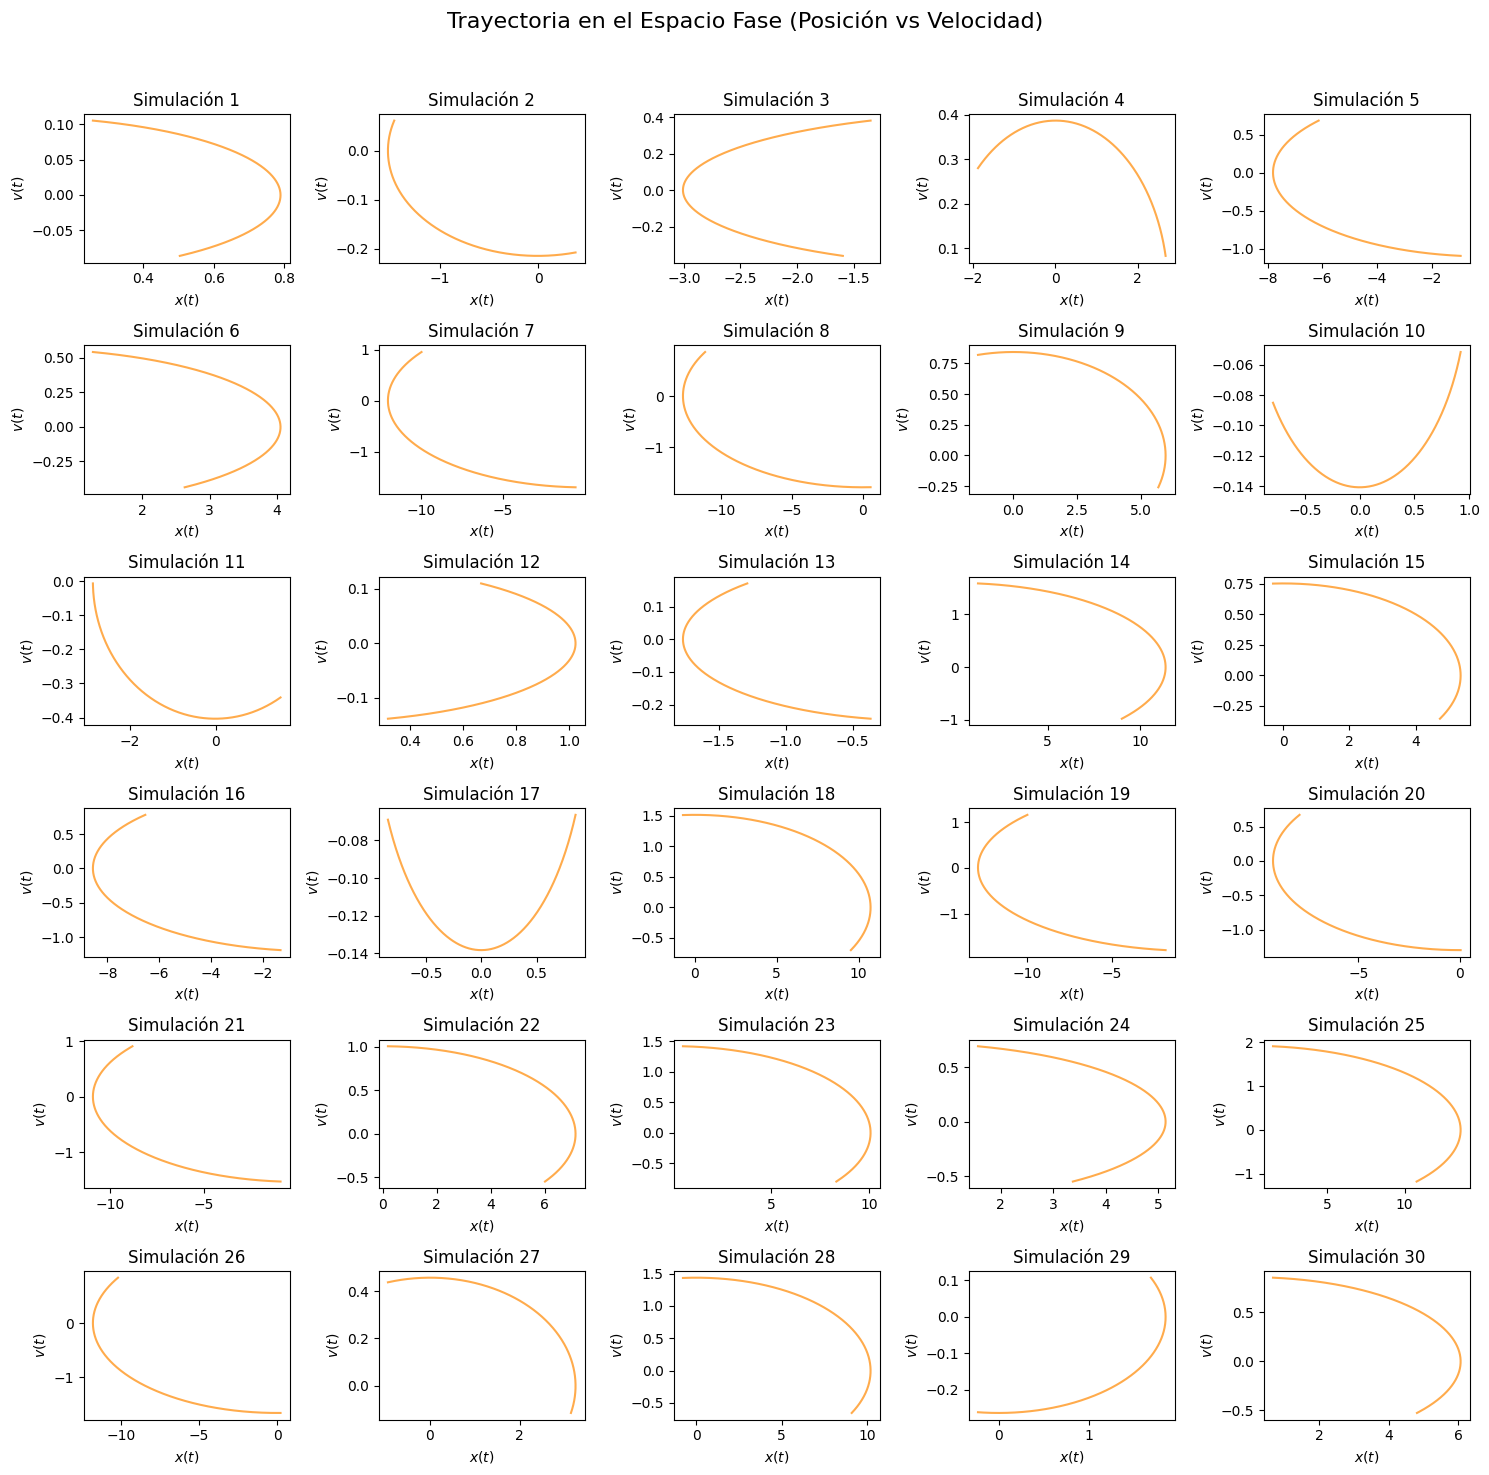

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ecuación diferencial del sistema armónico
def harmonic_eq(x, t, k):
    return x[1], -k * x[0]  # La derivada de la posición es la velocidad, y la de la velocidad es la aceleración

# Método de Euler para resolver la ecuación diferencial
def euler_2var(x, func, t, k, dt):
    y = func(x, t, k)
    return x[0] + dt * y[0], x[1] + dt * y[1]

# Función para calcular y graficar las soluciones
def calc_plot2var(method, equation, k, dt, n_steps, num_plots):
    # Array de tiempos
    t = np.arange(0, n_steps * dt, dt)

    # Crear la figura para las posiciones y velocidades frente al tiempo
    fig1, axes1 = plt.subplots(6, 5, figsize=(15, 15))  # 6 filas, 5 columnas
    fig1.suptitle("Posición y Velocidad vs Tiempo", fontsize=16)

    # Crear la figura para las trayectorias en el espacio fase
    fig2, axes2 = plt.subplots(6, 5, figsize=(15, 15))  # 6 filas, 5 columnas
    fig2.suptitle("Trayectoria en el Espacio Fase (Posición vs Velocidad)", fontsize=16)

    # Recorremos cada subgráfico
    for j in range(num_plots):
        # Inicializamos la solución con condiciones iniciales aleatorias
        x = np.zeros((n_steps, 2))  # n_steps x 2 para posición y velocidad
        x[0, 0] = np.random.uniform(-2, 2)  # Posición inicial aleatoria entre -2 y 2
        x[0, 1] = np.random.uniform(-2, 2)  # Velocidad inicial aleatoria entre -2 y 2

        # Calculamos las soluciones con el método de Euler
        for i in range(n_steps - 1):
            x[i + 1] = method(x[i], equation, t[i], k, dt)

        # Graficar en el espacio fase (posición vs velocidad)
        ax1 = axes2[j // 5, j % 5]  # Determinamos en qué subgráfico colocar esta trayectoria
        ax1.plot(x[:, 0], x[:, 1], '#ff8800', alpha=0.7)
        ax1.set_xlabel("$x(t)$")
        ax1.set_ylabel("$v(t)$")
        ax1.set_title(f"Simulación {j+1}")

        # Graficar posición y velocidad vs tiempo en un gráfico diferente
        ax2 = axes1[j // 5, j % 5]  # Determinamos en qué subgráfico colocar este gráfico
        ax2.plot(t, x[:, 0], 'r', label="$x(t)$", alpha=0.7)  # Posición vs tiempo
        ax2.plot(t, x[:, 1], 'b', label="$v(t)$", alpha=0.7)  # Velocidad vs tiempo
        ax2.set_xlabel("$t$")
        ax2.set_ylabel("Magnitudes")
        ax2.set_title(f"Simulación {j+1}")
        ax2.legend(loc='upper left')

    # Ajustamos el diseño para que no se sobrepongan las gráficas
    plt.tight_layout()
    fig1.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para evitar superposición de títulos
    fig2.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para evitar superposición de títulos

    # Mostrar las figuras
    plt.show()

# Parámetros de simulación
if __name__ == "__main__":
    dt = 0.03      # paso de tiempo
    n_steps = 500  # número de pasos
    k = 0.02       # constante del sistema armónico
    num_plots = 30 # Número de simulaciones a graficar
    calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps, num_plots)


#ANALISIS CRITICO

Actividad (1): Aprendí que trabajar con ecuaciones no lineales requiere un enfoque
diferente en comparación con los osciladores lineales. Los métodos de integración
numérica estándar, como el método de Euler o Runge-Kutta, pueden enfrentar problemas
de desbordamiento o divergencia debido a la naturaleza no lineal de la ecuación.
Encontré que en el manejo de los valores que crecían rápidamente y resultaban en
desbordamiento, por lo que limité el rango de valores de para evitar este problema.

Actividad (2):
Este ejercicio me permitió comprender cómo la elección de los parámetros, como el valor
de , el tamaño de la partición y el número de segmentos, afecta signiAcativamente el
resultado de un modelo o ecuación.

Al variar estos parámetros, pude observar cómo
cambian las soluciones, permitiéndome obtener una visión más completa de cómo se
comporta el sistema en diferentes conAguraciones.
Sin embargo, una de las limitaciones fue la capacidad de visualización para un rango
amplio de valores de . En algunos casos, los cambios en los resultados no fueron
fácilmente distinguibles debido a la escala utilizada o a la rapidez de los cambios en las
soluciones.

En el futuro, podría ser beneAcioso experimentar con diferentes técnicas de visualización,
como gráAcos logarítmicos o escalas adaptativas, para representar de manera más
efectiva la variación de las soluciones en un rango amplio de parámetros. Además, sería
útil explorar cómo otros parámetros del sistema podrían inmuir en las soluciones y cómo
estas interacciones pueden ser representadas visualmente para comprender mejor el
comportamiento del sistema en su conjunto.

#  **Implementar y ejecutar el código de Example 4.1.3, y generar la gráfica 4.1**
Para poder realizar este inciso, en este código, se ha reemplazado la función con ,
que es más adecuada en este contexto

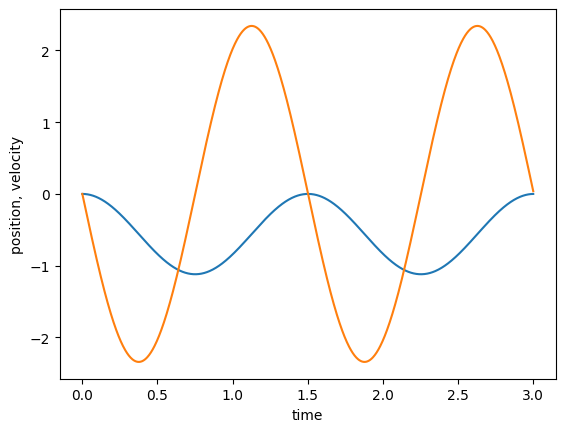

In [ ]:
from pylab import *
from scipy.integrate import odeint

N = 1000
xo = 0.0
vo = 0.0
tau = 3.0
dt = tau / float(N - 1)
k = 3.5
m = 0.2
gravity = 9.8

time = linspace(0, tau, N)

y = zeros([N, 2])
y[0, 0] = xo
y[0, 1] = vo

def SHO(state, time):
    g0 = state[1]
    g1 = -k / m * state[0] - gravity
    return array([g0, g1])

# Utiliza odeint en lugar de euler
y = odeint(SHO, y[0], time)

xdata = y[:, 0]
vdata = y[:, 1]

plot(time, xdata)
plot(time, vdata)
xlabel("time")
ylabel("position, velocity")
show()

# **Inciso (2)**
Implementar y ejecutar el código del Example 4.4.1 (Ayars), modificar k (3 valores
cercanos a 0, 3 del orden de 1-10, 3 mayores a 50) y comparar los resultados.

In [ ]:
def derivs(y, t, k):
    return -k * y
def rk2(y, time, dt, derivs, k):
    k0 = dt * derivs(y, time, k)
    k1 = dt * derivs(y + 0.5 * k0, time + dt, k)
    y_next = y + 0.5 * (k0 + k1)
    return y_next

# k cercano a 0
y1 = 1.0
k1 = 0.01 # Valor de k cercano a 0
t1 = 0.0
dt = 0.1

for _ in range(10):
    y1 = rk2(y1, t1, dt, derivs, k1)
    t1 += dt
print(f"k cercano a 0: {y1}")

# k del orden de 1-10
y2 = 1.0
k2 = 3.0 # Valor de k del orden de 1-10
t2 = 0.0

for _ in range(10):
    y2 = rk2(y2, t2, dt, derivs, k2)
    t2 += dt
print(f"k del orden de 1-10: {y2}")

# k mayor a 50
y3 = 1.0
k3 = 70.0 # Valor de k mayor a 50
t3 = 0.0
for _ in range(10):
    y3 = rk2(y3, t3, dt, derivs, k3)
    t3 += dt
print(f"k mayor a 50: {y3}")

k cercano a 0: 0.9900473578023287
k del orden de 1-10: 0.038759531084514354
k mayor a 50: 90949470.17729282


In [ ]:
def derivs(y, t, k):
    return -k * y
def rk2(y, time, dt, derivs, k):
    k0 = dt * derivs(y, time, k)
    k1 = dt * derivs(y + 0.5 * k0, time + dt, k)
    y_next = y + 0.5 * (k0 + k1)
    return y_next

# k cercano a 0
y1 = 1.0
k1 = 0.001 # Valor de k cercano a 0
t1 = 0.0
dt = 0.1
for _ in range(10):
    y1 = rk2(y1, t1, dt, derivs, k1)
    t1 += dt
print(f"k cercano a 0: {y1}")

# k del orden de 1-10
y2 = 1.0
k2 = 4.0 # Valor de k del orden de 1-10
t2 = 0.0

for _ in range(10):
    y2 = rk2(y2, t2, dt, derivs, k2)
    t2 += dt
print(f"k del orden de 1-10: {y2}")

# k mayor a 50
y3 = 1.0
k3 = 80.0 # Valor de k mayor a 50
t3 = 0.0
for _ in range(10):
    y3 = rk2(y3, t3, dt, derivs, k3)
    t3 += dt
print(f"k mayor a 50: {y3}")

k cercano a 0: 0.9990004748575304
k del orden de 1-10: 0.011529215046068466
k mayor a 50: 3486784401.0


# **Inciso (3)**
Implementar y ejecutar el código de Example 4.5.2 (Ayars), modificar k como el punto
2.

In [ ]:
from math import sin, cos
from numpy import array

def rk2(state, time, dt, derivs, k):

    k1 = dt * array(derivs(state, time, k))
    k2 = dt * array(derivs(state + 0.5 * k1, time + 0.5 * dt, k))
    return state + k2

gravity = 9.8 # Aceleración
length = 1.0 # Longitud del péndulo
b = 0.1 # Coeficiente de amortiguamiento
beta = 0.2 # Amplitud de la fuerza externa
omega = 0.4 # Frecuencia de la fuerza externa
dt = 0.05 # Tamaño del paso de tiempo

def pendulum(state, time, k):
    g0 = state[1]
    g1 = -gravity / length * sin(state[0]) - b * state[1] + beta * cos(omega*time)
    return [g0, g1]


# k cercano a 0
k1 = 0.01
state1 = [0.1, 0.0]
t1 = 0.0

for _ in range(100):
    state1 = rk2(state1, t1, dt, pendulum, k1)
    t1 += dt
print(f"k cercano a 0: {state1}")

# k del orden de 1-10
k2 = 1.0
state2 = [0.1, 0.0]
t2 = 0.0

for _ in range(100):
    state2 = rk2(state2, t2, dt, pendulum, k2)
    t2 += dt
print(f"k del orden de 1-10: {state2}")

# k mayor a 50
k3 = 60.0
state3 = [0.1, 0.0]
t3 = 0.0
for _ in range(100):
    state3 = rk2(state3, t3, dt, pendulum, k3)
    t3 += dt
print(f"k mayor a 50: {state3}")

k cercano a 0: [-0.07053512 -0.00740869]
k del orden de 1-10: [-0.07053512 -0.00740869]
k mayor a 50: [-0.07053512 -0.00740869]


In [ ]:
from math import sin, cos
from numpy import array
def rk2(state, time, dt, derivs, k):
    k1 = dt * array(derivs(state, time, k))
    k2 = dt * array(derivs(state + 0.5 * k1, time + 0.5 * dt, k))
    return state + k2

gravity = 9.8 # Aceleración
length = 1.0 # Longitud del péndulo
b = 0.1 # Coeficiente de amortiguamiento
beta = 0.2 # Amplitud de la fuerza externa
omega = 0.4 # Frecuencia de la fuerza externa
dt = 0.05 # Tamaño del paso de tiempo

def pendulum(state, time, k):
    g0 = state[1]
    g1 = -gravity / length * sin(state[0]) - b * state[1] + beta * cos(omega * time)
    return [g0, g1]

# k cercano a 0
k1 = 0.001
state1 = [0.1, 0.0]
t1 = 0.0

for _ in range(100):
    state1 = rk2(state1, t1, dt, pendulum, k1)
    t1 += dt
print(f"k cercano a 0: {state1}")

# k del orden de 1-10
k2 = 2.0
state2 = [0.1, 0.0]
t2 = 0.0
for _ in range(100):
    state2 = rk2(state2, t2, dt, pendulum, k2)
    t2 += dt
print(f"k del orden de 1-10: {state2}")

# k mayor a 50
k3 = 70.0
state3 = [0.1, 0.0]
t3 = 0.0
for _ in range(100):
    state3 = rk2(state3, t3, dt, pendulum, k3)
    t3 += dt
print(f"k mayor a 50: {state3}")

k cercano a 0: [-0.07053512 -0.00740869]
k del orden de 1-10: [-0.07053512 -0.00740869]
k mayor a 50: [-0.07053512 -0.00740869]


In [ ]:
from math import sin, cos
from numpy import array
def rk2(state, time, dt, derivs, k):
    k1 = dt * array(derivs(state, time, k))
    k2 = dt * array(derivs(state + 0.5 * k1, time + 0.5 * dt, k))
    return state + k2

gravity = 9.8 # Aceleración
length = 1.0 # Longitud del péndulo
b = 0.1 # Coeficiente de amortiguamiento
beta = 0.2 # Amplitud de la fuerza externa
omega = 0.4 # Frecuencia de la fuerza externa
dt = 0.05 # Tamaño del paso de tiempo

def pendulum(state, time, k):
    g0 = state[1]
    g1 = -gravity / length * sin(state[0]) - b * state[1] + beta * cos(omega * time)
    return [g0, g1]
# k cercano a 0
k1 = 0.0001
state1 = [0.1, 0.0]
t1 = 0.0

for _ in range(100):
    state1 = rk2(state1, t1, dt, pendulum, k1)
    t1 += dt
print(f"k cercano a 0: {state1}")

# k del orden de 1-10
k2 = 3.0
state2 = [0.1, 0.0]
t2 = 0.0

for _ in range(100):
    state2 = rk2(state2, t2, dt, pendulum, k2)
    t2 += dt
print(f"k del orden de 1-10: {state2}")

# k mayor a 50
k3 = 80.0
state3 = [0.1, 0.0]
t3 = 0.0
for _ in range(100):
    state3 = rk2(state3, t3, dt, pendulum, k3)
    t3 += dt
print(f"k mayor a 50: {state3}")

k cercano a 0: [-0.07053512 -0.00740869]
k del orden de 1-10: [-0.07053512 -0.00740869]
k mayor a 50: [-0.07053512 -0.00740869]
